In [216]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [217]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Data

### Importing Raw data 

In [218]:
# Importing the csv file
data = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')

## Source Code

### Exploratory Data Analysis

In [219]:
data.shape

(1200, 28)

In [220]:
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [221]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [222]:
# Looking for missing data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

## Analysis of Department wise Perfomance

In [223]:
# A new pandas Dataframe is created to analyze department wise performance as asked.
dept = data.iloc[:,[5,27]].copy()
dept_per = dept.copy()

In [224]:
# Finding out the mean performance of all the departments and plotting its bar graph using seaborn.
dept_per.groupby(by='EmpDepartment')['PerformanceRating'].mean()

EmpDepartment
Data Science              3.050000
Development               3.085873
Finance                   2.775510
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Name: PerformanceRating, dtype: float64

<Axes: xlabel='EmpDepartment', ylabel='PerformanceRating'>

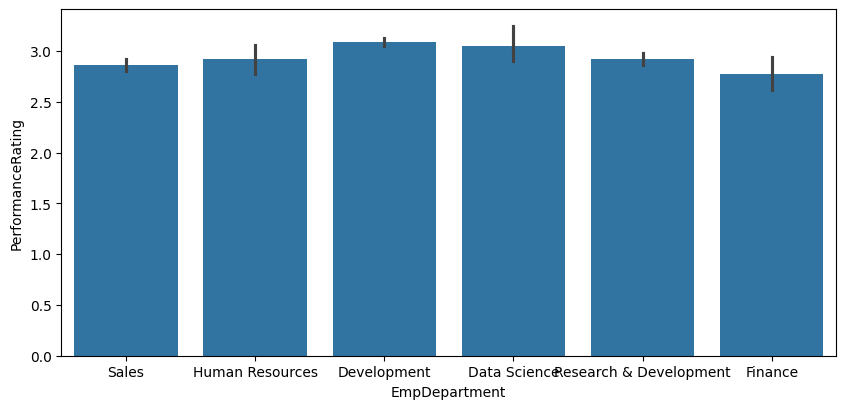

In [225]:
plt.figure(figsize=(10,4.5))
sns.barplot(x='EmpDepartment', y='PerformanceRating', data=dept_per)

In [226]:
# Analyze each department separately
dept_per.groupby(by='EmpDepartment')['PerformanceRating'].value_counts()

EmpDepartment           PerformanceRating
Data Science            3                     17
                        4                      2
                        2                      1
Development             3                    304
                        4                     44
                        2                     13
Finance                 3                     30
                        2                     15
                        4                      4
Human Resources         3                     38
                        2                     10
                        4                      6
Research & Development  3                    234
                        2                     68
                        4                     41
Sales                   3                    251
                        2                     87
                        4                     35
Name: count, dtype: int64

In [227]:
# Creating a new dataframe to analyze each department separately
department = pd.get_dummies(dept_per['EmpDepartment'])
performance = pd.DataFrame(dept_per['PerformanceRating'])
dept_rating = pd.concat([department,performance],axis=1)

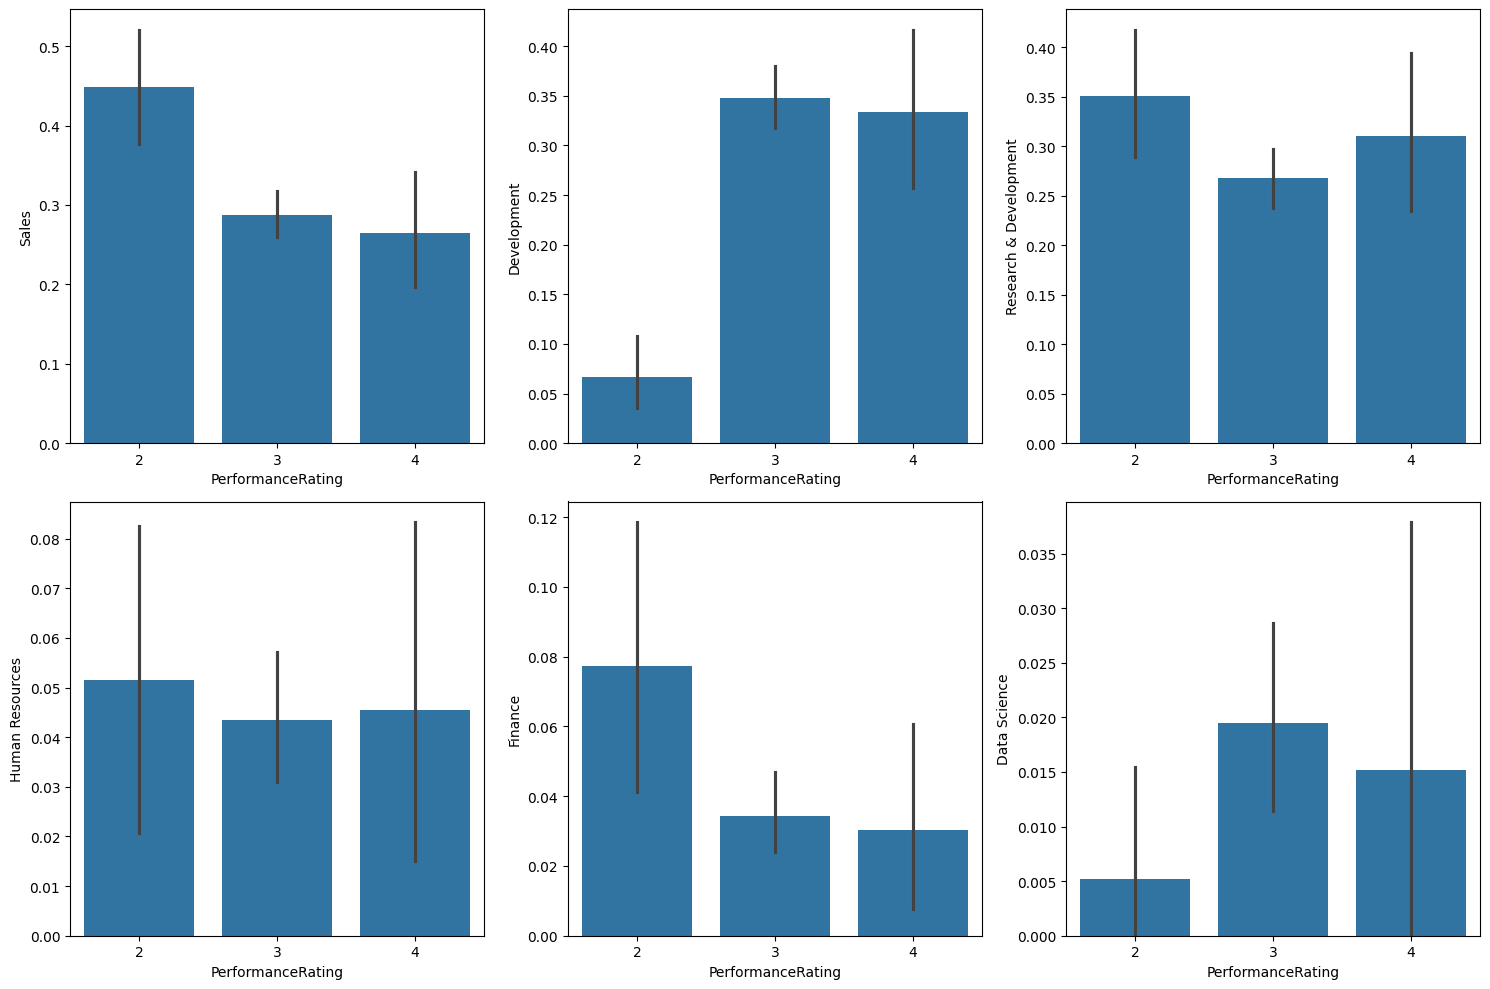

In [228]:
# Plotting a separate bar graph for performance of each department using seaborn
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.barplot(x='PerformanceRating', y='Sales', data=dept_rating)

plt.subplot(2, 3, 2)
sns.barplot(x='PerformanceRating', y='Development', data=dept_rating)

plt.subplot(2, 3, 3)
sns.barplot(x='PerformanceRating', y='Research & Development', data=dept_rating)

plt.subplot(2, 3, 4)
sns.barplot(x='PerformanceRating', y='Human Resources', data=dept_rating)

plt.subplot(2, 3, 5)
sns.barplot(x='PerformanceRating', y='Finance', data=dept_rating)

plt.subplot(2, 3, 6)
sns.barplot(x='PerformanceRating', y='Data Science', data=dept_rating)

plt.tight_layout()
plt.show()

### Data Processing/ Data Munging

In [229]:
# Encoding all the ordinal columns and creating a dummy variable for them to see if there are any effects on Performance Rating
enc = LabelEncoder()
for i in (2,3,4,5,6,7,16,26):
    data.iloc[:,i] = enc.fit_transform(data.iloc[:,i])
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,1,2,2,5,13,2,10,3,...,4,10,2,2,10,7,0,8,0,3
1,E1001006,47,1,2,2,5,13,2,14,4,...,4,20,2,3,7,7,1,7,0,3
2,E1001007,40,1,1,1,5,13,1,5,4,...,3,20,2,3,18,13,1,12,0,4
3,E1001009,41,1,0,0,3,8,2,10,4,...,2,23,2,2,21,6,12,6,0,3
4,E1001010,60,1,2,2,5,13,2,16,4,...,4,10,1,3,2,2,2,2,0,3


## Feature Selection    
-     There are a lot of columns in the predictor variable. So, the correlation coeffecient is calculated to see which of them are important and these are then used for training methods. From there, we also get the top factors which affect performance. We can see that the most important features selectd were Department, Job Role, Environment Satisfaction, Last Salary Hike Percent, Work Life Balance, Experience Years At This Company, Experience Years In Current Role, Years Since Last Promotion, Years With Current Manager. These were selected because their correlation coeffecient with Performance Rating was more than 0.1. 
-     Standardization and Label Encoding was also used for feature transformation.
-     A separate analysis considering all the predictors was carried out but it resulted in decreasing the accuracy. Similarly, Principal Component Analysis also reduces the accuracy.
-     Top 3 factors which affect the employee performance are 1. Employee EnvironmentSatisfaction, 2. Employee Last Salary Hike Percent and 3. Years Since Last Promotion

In [230]:
# Finding out the correlation coeffecient to find out which predictors are significant.
data.corr(numeric_only=True)

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
Age,1.000000,0.020937,0.207313,0.013814,0.062867,0.027216,0.509139,-0.002436,0.284408,-0.006105,0.049749,0.680886,-0.016053,-0.019563,0.318852,0.217163,0.228199,0.205098,-0.040164
DistanceFromHome,0.020937,1.000000,0.045856,-0.017719,0.013730,0.003231,0.017270,-0.003036,-0.021411,0.044974,-0.009509,0.027306,-0.032082,-0.044788,0.021908,0.019898,0.013246,0.017860,-0.046142
EmpEducationLevel,0.207313,0.045856,1.000000,-0.037103,0.014095,0.027544,0.100734,0.000357,0.128674,0.002358,-0.016690,0.151062,-0.013674,0.010276,0.076332,0.066672,0.054313,0.088988,0.020529
EmpEnvironmentSatisfaction,0.013814,-0.017719,-0.037103,1.000000,-0.049501,0.004865,-0.008272,-0.004319,0.017270,-0.047271,-0.010504,-0.012894,0.001192,-0.000262,-0.000561,0.025491,0.010732,-0.011702,0.395561
EmpHourlyRate,0.062867,0.013730,0.014095,-0.049501,1.000000,0.054741,-0.018606,-0.066417,0.040484,-0.015934,0.008783,0.026034,-0.024160,0.016189,-0.000399,-0.011871,-0.010000,-0.004576,-0.043116
EmpJobInvolvement,0.027216,0.003231,0.027544,0.004865,0.054741,1.000000,-0.034349,-0.005501,0.018211,-0.001742,0.018037,-0.028851,-0.025168,-0.014129,-0.039720,0.002910,-0.019944,0.012924,-0.010539
EmpJobLevel,0.509139,0.017270,0.100734,-0.008272,-0.018606,-0.034349,1.000000,-0.011853,0.127477,-0.020975,0.002992,0.784229,-0.000389,0.049218,0.540377,0.399235,0.360880,0.374872,-0.076632
EmpJobSatisfaction,-0.002436,-0.003036,0.000357,-0.004319,-0.066417,-0.005501,-0.011853,1.000000,-0.049865,0.031847,-0.022028,-0.026824,-0.028031,-0.018548,0.001807,0.002018,-0.006508,-0.022096,0.000606
NumCompaniesWorked,0.284408,-0.021411,0.128674,0.017270,0.040484,0.018211,0.127477,-0.049865,1.000000,-0.011788,0.057917,0.221505,-0.050817,0.002489,-0.129797,-0.097271,-0.031656,-0.109937,0.020980
EmpLastSalaryHikePercent,-0.006105,0.044974,0.002358,-0.047271,-0.015934,-0.001742,-0.020975,0.031847,-0.011788,1.000000,-0.042892,-0.005933,-0.013439,-0.017001,-0.019830,-0.004957,-0.015911,-0.007666,0.333722


In [231]:
# Dropping the first columns as it is of no use for analysis.
data.drop(['EmpNumber'],inplace=True,axis=1)

In [232]:
data.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,2,2,5,13,2,10,3,4,...,4,10,2,2,10,7,0,8,0,3
1,47,1,2,2,5,13,2,14,4,4,...,4,20,2,3,7,7,1,7,0,3
2,40,1,1,1,5,13,1,5,4,4,...,3,20,2,3,18,13,1,12,0,4
3,41,1,0,0,3,8,2,10,4,2,...,2,23,2,2,21,6,12,6,0,3
4,60,1,2,2,5,13,2,16,4,1,...,4,10,1,3,2,2,2,2,0,3


In [233]:
# Here we have selected only the important columns
y = data.PerformanceRating
#X = data.iloc[:,0:-1]  All predictors were selected it resulted in dropping of accuracy.
X = data.iloc[:,[4,5,9,16,20,21,22,23,24]] # Taking only variables with correlation coeffecient greater than 0.1
X.head()

,EmpDepartment,EmpJobRole,EmpEnvironmentSatisfaction,EmpLastSalaryHikePercent,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,5,13,4,12,2,10,7,0,8
1,5,13,4,12,3,7,7,1,7
2,5,13,4,21,3,18,13,1,12
3,3,8,2,15,2,21,6,12,6
4,5,13,1,14,3,2,2,2,2


In [234]:
# Splitting into train and test for calculating the accuracy
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [235]:
# Standardization technique is used
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [236]:
X_train.shape

(840, 9)

In [237]:
X_test.shape

(360, 9)

#### PCA was used, it resulted in decline of accuracy.
    from sklearn.decomposition import PCA
    pca=PCA(n_components=None)
    X_train=pca.fit_transform(X_train)
    X_test=pca.transform(X_test)
    pca.explained_variance_ratio_

## Models

-     In the section below, we used algorithms like Logistic Regression, Support Vector Machine, Decision Tree, Random Forest, Naive Bayes, K-Nearest Neighbor, XGBoost Classifier and Artificial Neural Network to calculate the accuracy and found out that Random Forest with GridSearchCV gives the maximum accuracy of 93%.

## 1. Logistic Regression

In [238]:
# Training the model
from sklearn.linear_model import LogisticRegression
model_logr = LogisticRegression()
model_logr.fit(X_train,y_train)

LogisticRegression()

In [239]:
# Predicting the model
y_predict_log = model_logr.predict(X_test)

In [240]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_log))
print(classification_report(y_test,y_predict_log))

0.8333333333333334
              precision    recall  f1-score   support

           2       0.65      0.48      0.55        63
           3       0.86      0.94      0.90       264
           4       0.81      0.67      0.73        33

    accuracy                           0.83       360
   macro avg       0.78      0.69      0.73       360
weighted avg       0.82      0.83      0.82       360



In [241]:
confusion_matrix(y_test,y_predict_log)

array([[ 30,  30,   3],
       [ 14, 248,   2],
       [  2,   9,  22]])

## 2. Support Vector Machine

In [242]:
# Training the model
from sklearn.svm import SVC
rbf_svc = SVC(kernel='rbf', C=100, random_state=10).fit(X_train,y_train)

In [243]:
# Predicting the model
y_predict_svm = rbf_svc.predict(X_test)

In [244]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_svm))
print(classification_report(y_test,y_predict_svm))

0.8444444444444444
              precision    recall  f1-score   support

           2       0.74      0.78      0.76        63
           3       0.92      0.88      0.90       264
           4       0.54      0.67      0.59        33

    accuracy                           0.84       360
   macro avg       0.73      0.78      0.75       360
weighted avg       0.85      0.84      0.85       360



In [245]:
confusion_matrix(y_test,y_predict_svm)

array([[ 49,  13,   1],
       [ 13, 233,  18],
       [  4,   7,  22]])

## 3. Decision Tree with GridSearchCV

In [246]:
# Training the model
from sklearn.tree import DecisionTreeClassifier

classifier_dtg=DecisionTreeClassifier(random_state=42,splitter='best')
parameters=[{'min_samples_split':[2,3,4,5],'criterion':['gini']},{'min_samples_split':[2,3,4,5],'criterion':['entropy']}]

model_griddtree=GridSearchCV(estimator=classifier_dtg, param_grid=parameters, scoring='accuracy',cv=10)
model_griddtree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'criterion': ['gini'],
                          'min_samples_split': [2, 3, 4, 5]},
                         {'criterion': ['entropy'],
                          'min_samples_split': [2, 3, 4, 5]}],
             scoring='accuracy')

In [247]:
model_griddtree.best_params_

{'criterion': 'entropy', 'min_samples_split': 5}

In [248]:
# Predicting the model
y_predict_dtree = model_griddtree.predict(X_test)

In [249]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_dtree))
print(classification_report(y_test,y_predict_dtree))

0.9055555555555556
              precision    recall  f1-score   support

           2       0.85      0.83      0.84        63
           3       0.94      0.95      0.94       264
           4       0.75      0.73      0.74        33

    accuracy                           0.91       360
   macro avg       0.85      0.83      0.84       360
weighted avg       0.90      0.91      0.90       360



In [250]:
confusion_matrix(y_test,y_predict_dtree)

array([[ 52,  10,   1],
       [  7, 250,   7],
       [  2,   7,  24]])

## 4. Random Forest with GridSearchCV

In [251]:
# Training the model
from sklearn.ensemble import RandomForestClassifier

classifier_rfg=RandomForestClassifier(random_state=33,n_estimators=23)
parameters=[{'min_samples_split':[2,3,4,5],'criterion':['gini','entropy'],'min_samples_leaf':[1,2,3]}]

model_gridrf=GridSearchCV(estimator=classifier_rfg, param_grid=parameters, scoring='accuracy',cv=10)
model_gridrf.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=23, random_state=33),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'min_samples_leaf': [1, 2, 3],
                          'min_samples_split': [2, 3, 4, 5]}],
             scoring='accuracy')

In [252]:
model_gridrf.best_params_

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 4}

In [253]:
# Predicting the model
y_predict_rf = model_gridrf.predict(X_test)

In [254]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_rf))
print(classification_report(y_test,y_predict_rf))

0.9305555555555556
              precision    recall  f1-score   support

           2       0.92      0.89      0.90        63
           3       0.94      0.97      0.96       264
           4       0.83      0.73      0.77        33

    accuracy                           0.93       360
   macro avg       0.90      0.86      0.88       360
weighted avg       0.93      0.93      0.93       360



In [255]:
confusion_matrix(y_test,y_predict_rf)

array([[ 56,   7,   0],
       [  4, 255,   5],
       [  1,   8,  24]])

## 5. Naive Bayes Bernoulli

In [256]:
# Training the model
from sklearn.naive_bayes import BernoulliNB
model_nb = BernoulliNB()
model_nb.fit(X_train,y_train)

BernoulliNB()

In [257]:
# Predicting the model
y_predict_nb = model_nb.predict(X_test)

In [258]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_nb))
print(classification_report(y_test,y_predict_nb))

0.7944444444444444
              precision    recall  f1-score   support

           2       0.75      0.48      0.58        63
           3       0.80      0.97      0.88       264
           4       0.00      0.00      0.00        33

    accuracy                           0.79       360
   macro avg       0.52      0.48      0.49       360
weighted avg       0.72      0.79      0.74       360



In [259]:
confusion_matrix(y_test,y_predict_nb)

array([[ 30,  33,   0],
       [  8, 256,   0],
       [  2,  31,   0]])

## 6. K-Nearest Neighbor

In [260]:
# Training the model
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=10,metric='euclidean') # Maximum accuracy for n=10
model_knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [261]:
# Predicting the model
y_predict_knn = model_knn.predict(X_test)

In [262]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_knn))
print(classification_report(y_test,y_predict_knn))

0.8333333333333334
              precision    recall  f1-score   support

           2       0.74      0.59      0.65        63
           3       0.85      0.94      0.90       264
           4       0.78      0.42      0.55        33

    accuracy                           0.83       360
   macro avg       0.79      0.65      0.70       360
weighted avg       0.83      0.83      0.82       360



In [263]:
confusion_matrix(y_test,y_predict_knn)

array([[ 37,  25,   1],
       [ 12, 249,   3],
       [  1,  18,  14]])

## 7. XGBoost Classifier

In [264]:
# Training the model
from xgboost import XGBClassifier

y_train_normalized = np.unique(y_train, return_inverse=True)[1]

model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train_normalized)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [265]:
# Predicting the model
y_predict_xgb = model_xgb.predict(X_test)

In [266]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_xgb))
print(classification_report(y_test,y_predict_xgb))

0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00      63.0
           3       0.00      0.00      0.00     264.0
           4       0.00      0.00      0.00      33.0

    accuracy                           0.00     360.0
   macro avg       0.00      0.00      0.00     360.0
weighted avg       0.00      0.00      0.00     360.0



In [267]:
confusion_matrix(y_test,y_predict_xgb)

array([[  0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0],
       [ 55,   8,   0,   0,   0],
       [  5, 251,   8,   0,   0],
       [  2,   6,  25,   0,   0]])

## 8. Artificial Neural Network

In [268]:
# Training the model
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier(hidden_layer_sizes=(100,100,100),batch_size=10,learning_rate_init=0.01,max_iter=2000,random_state=10)
model_mlp.fit(X_train,y_train)

MLPClassifier(batch_size=10, hidden_layer_sizes=(100, 100, 100),
              learning_rate_init=0.01, max_iter=2000, random_state=10)

In [269]:
# Predicting the model
y_predict_mlp = model_mlp.predict(X_test)

In [270]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_mlp))
print(classification_report(y_test,y_predict_mlp))

0.8916666666666667
              precision    recall  f1-score   support

           2       0.84      0.84      0.84        63
           3       0.92      0.94      0.93       264
           4       0.74      0.61      0.67        33

    accuracy                           0.89       360
   macro avg       0.83      0.80      0.81       360
weighted avg       0.89      0.89      0.89       360



In [271]:
confusion_matrix(y_test,y_predict_mlp)

array([[ 53,  10,   0],
       [  9, 248,   7],
       [  1,  12,  20]])

In [272]:
# Exporting the trained model
import joblib
joblib.dump(model_gridrf,'INX_Future_Inc.ml')

['INX_Future_Inc.ml']